Total number of images (X): 1797
Total number of labels (Y): 1797
SVM training completed.
Model Accuracy: 0.8166666666666667


Saving Screenshot 2025-12-14 191942.png to Screenshot 2025-12-14 191942.png


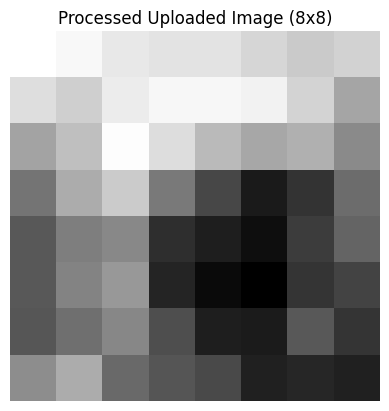

Predicted Digit: 5


In [ ]:
# Classical ML based Object recognition

import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from skimage.feature import hog
from skimage.transform import resize

# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

print("Total number of images (X):", X.shape[0])
print("Total number of labels (Y):", y.shape[0])

# Extract HOG features
features = []

for img in X:
    hog_feature = hog(
        img,
        pixels_per_cell=(4, 4),
        cells_per_block=(1, 1),
        orientations=9
    )
    features.append(hog_feature)

features = np.array(features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print("SVM training completed.")

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

# Upload image (Google Colab)
from google.colab import files
uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

# Convert to grayscale
if len(img.shape) == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Resize to 8x8
img_resized = resize(img_gray, (8, 8), anti_aliasing=True)

# Normalize and invert
img_resized = img_resized / img_resized.max()
img_resized = 1 - img_resized

# Display processed image
plt.imshow(img_resized, cmap='gray')
plt.title("Processed Uploaded Image (8x8)")
plt.axis('off')
plt.show()

# Extract HOG feature from test image
test_feature = hog(
    img_resized,
    pixels_per_cell=(4, 4),
    cells_per_block=(1, 1),
    orientations=9
)

# Predict digit
prediction = model.predict([test_feature])
print("Predicted Digit:", prediction[0])
